# Purpose

- The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Import dataset
ins=pd.read_csv('insurance.csv')

In [3]:
ins.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [19]:
##Creating a backup of the orignal data
backup=ins.copy()

In [4]:
##Checking shape
ins.shape

(1338, 7)

In [5]:
##checking info
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- The data type seems to be correct as per the data.

In [7]:
##checking for any missing value
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

- No missing values in the column

## Univariate Analysis(Categorical-Columns)

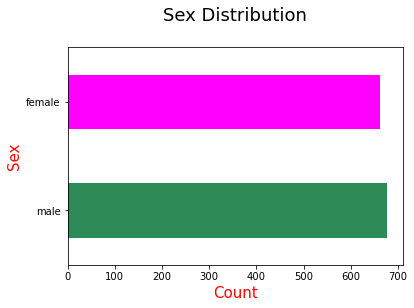

In [22]:
##Checking the count of sex in the data set
ins['sex'].value_counts().plot.barh(color=['Seagreen', 'magenta'])
plt.title('Sex Distribution\n',fontdict={'fontsize':18, 'color':'Black'})
plt.xlabel('Count', fontdict={'fontsize':15, 'color':'red'})
plt.ylabel('Sex', fontdict={'fontsize':15, 'color':'red'})
plt.show()

- Males  are a bit higher than females but that's very small.

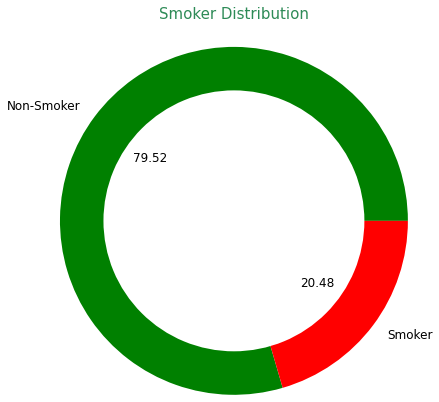

In [16]:
##Checking smoker attribute for the data set.
plt.figure.figsize=[9,10]
plt.pie(ins['smoker'].value_counts(normalize=True),colors=['Green','Red'],labels=['Non-Smoker','Smoker'],autopct='%.2f',textprops={'fontsize': 12}, radius=2)
plt.pie([1], colors=['w'], radius=1.5)
plt.title('Smoker Distribution\n\n\n\n\n', fontdict={'size':15, 'color':'Seagreen'})
plt.show()

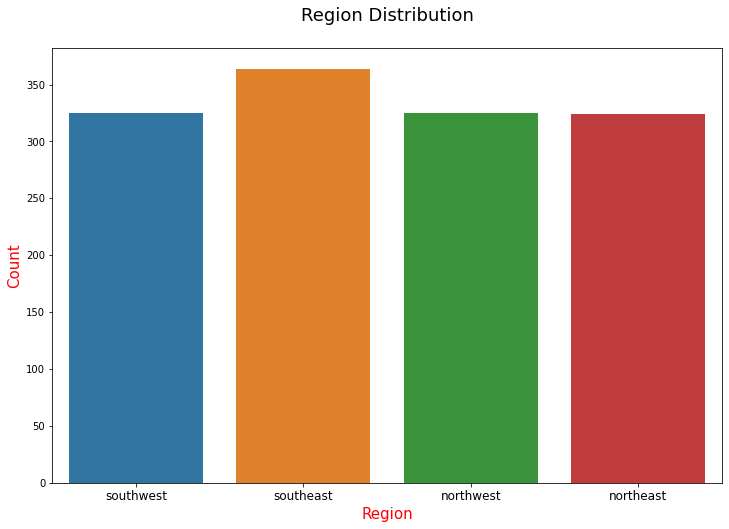

In [27]:
##Checing region distribution
plt.figure(figsize=[12,8])
sns.countplot(ins['region'])
plt.title('Region Distribution\n',fontdict={'fontsize':18, 'color':'Black'})
plt.xlabel('Region', fontdict={'fontsize':15, 'color':'red'})
plt.ylabel('Count', fontdict={'fontsize':15, 'color':'red'})
plt.xticks(fontsize=12)
plt.show()

In [23]:
##Extracting  the numeric columns for better analysis.
num_cols=[]
cat_cols=[]
for i in ins.columns:
    if ins[i].dtype in ('int64','float64','int32'):
        num_cols.append(i)
    else:
        cat_cols.append(i)   

In [24]:
num_cols

['age', 'bmi', 'children', 'expenses']

In [25]:
cat_cols

['sex', 'smoker', 'region']

## Univariate Analysis(Numerical-columns)

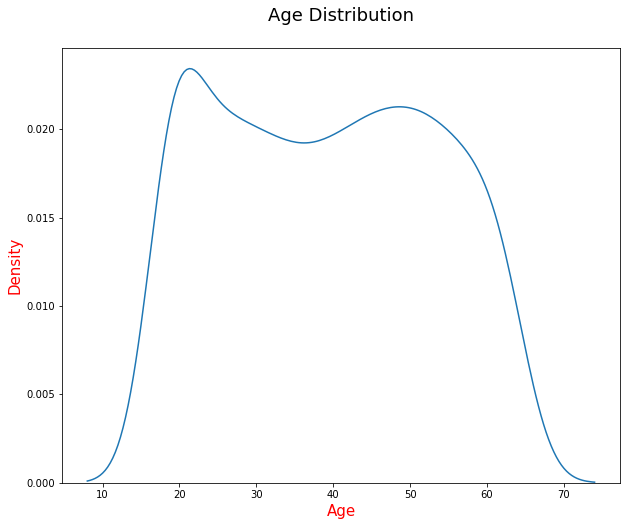

In [30]:
##Checking age distribution
plt.figure(figsize=[10,8])
sns.distplot(ins['age'], hist=False)
plt.title('Age Distribution\n',fontdict={'fontsize':18, 'color':'Black'})
plt.xlabel('Age', fontdict={'fontsize':15, 'color':'red'})
plt.ylabel('Density', fontdict={'fontsize':15, 'color':'red'})
plt.show()

Observation:

- From the above plot I could see that there is somewhat higher count for younger people.
- There are fewer people of higher age group

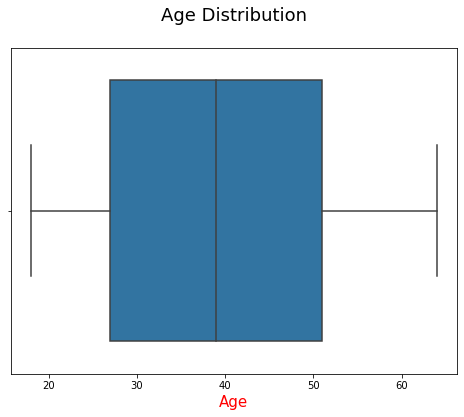

In [32]:
plt.figure(figsize=[8,6])
sns.boxplot(ins['age'])
plt.title('Age Distribution\n',fontdict={'fontsize':18, 'color':'Black'})
plt.xlabel('Age', fontdict={'fontsize':15, 'color':'red'})
plt.show()

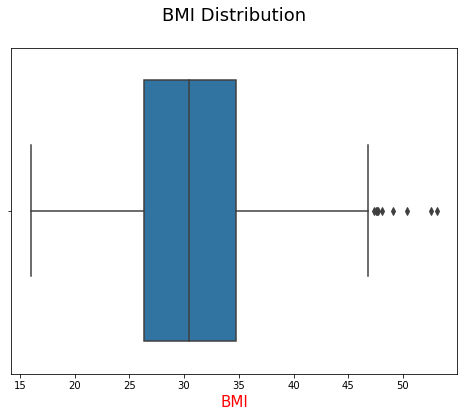

In [34]:
##Checking for bmi
plt.figure(figsize=[8,6])
sns.boxplot(ins['bmi'])
plt.title('BMI Distribution\n',fontdict={'fontsize':18, 'color':'Black'})
plt.xlabel('BMI', fontdict={'fontsize':15, 'color':'red'})
plt.show()

- We can see some people with higher BMI, they may be the people at higher ages.

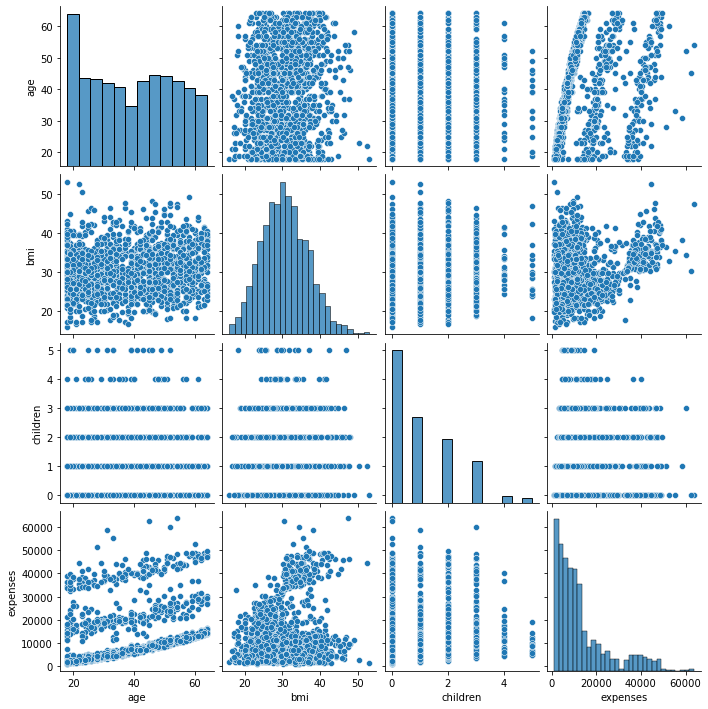

In [41]:
##Let's plot a pairplot to understand how  the correlation is
sns.pairplot(ins)
plt.show()

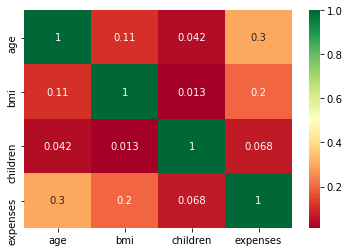

In [45]:
##Let's plot a correlation matrix to make things more clearer
sns.heatmap(ins.corr(), cmap='RdYlGn', annot=True)
plt.show()

## We do some sort of encoding as some of the attrbiutes are of categorical type.

In [46]:
ins.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [48]:
#Coverting sex to 0 and 1 , 0 being for male and 1 being for female
ins['sex']=ins['sex'].apply(lambda x: 1 if x=='female' else 0)

In [49]:
#Coverting smoker to 0 and 1 , 0 being for no and 1 being for yes
ins['smoker']=ins['smoker'].apply(lambda x: 1 if x=='yes' else 0)

In [50]:
ins.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86


In [51]:
#creating dummy variables for region attribute
status=pd.get_dummies(ins['region'])
status.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [52]:
##Concatenating status and ins
ins=pd.concat([ins, status], axis=1)

In [53]:
ins.head()

,age,sex,bmi,children,smoker,region,expenses,northeast,northwest,southeast,southwest
0,19,1,27.9,0,1,southwest,16884.92,0,0,0,1
1,18,0,33.8,1,0,southeast,1725.55,0,0,1,0
2,28,0,33.0,3,0,southeast,4449.46,0,0,1,0
3,33,0,22.7,0,0,northwest,21984.47,0,1,0,0
4,32,0,28.9,0,0,northwest,3866.86,0,1,0,0


### As per the understanding of dummy variables, for m levels there should be m-1 dummy variable. As we have 4 regions so there would be 3 dummy variables. Hence dropping off 'Southwest' dummy variable  and also the region column as we have created dummies for the same column.

- 000 then indicating southwest
- 001 then indicating southeast
- 010 then indicating northwest
- 100 then indicating northeast


In [54]:
ins.drop(['southwest','region'], axis=1, inplace=True)

In [57]:
ins.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast
0,19,1,27.9,0,1,16884.92,0,0,0
1,18,0,33.8,1,0,1725.55,0,0,1
2,28,0,33.0,3,0,4449.46,0,0,1
3,33,0,22.7,0,0,21984.47,0,1,0
4,32,0,28.9,0,0,3866.86,0,1,0


In [58]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   expenses   1338 non-null   float64
 6   northeast  1338 non-null   uint8  
 7   northwest  1338 non-null   uint8  
 8   southeast  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 66.8 KB


### Now the dataset could be used for modelling as all of the attributes are converted to numeric types.

In [59]:
##Importing necessary libraries for modelling
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [63]:
##spliiting the dataset into test and train
df_train, df_test=train_test_split(ins, train_size=0.7,random_state=100)

In [64]:
##checking the shape of each dataframe
print(df_test.shape)
print(df_train.shape)

(402, 9)
(936, 9)


### From hereon we would only focus on the train set  and then at the end we would evaluate the model on the test set and would see how well dos it performs.

In [65]:
df_train.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast
966,51,0,24.8,2,1,23967.38,0,1,0
522,51,1,33.9,0,0,9866.30,1,0,0
155,44,0,39.5,0,0,6948.70,0,1,0
671,29,1,31.2,0,0,3943.60,1,0,0
1173,38,0,29.3,2,0,6457.84,0,1,0


In [68]:
num_cols=[]
cat_cols=[]
for i in ins.columns:
    if ins[i].dtype in ('int64','float64','int32'):
        num_cols.append(i)
    else:
        cat_cols.append(i)   

In [69]:
num_cols

['age', 'sex', 'bmi', 'children', 'smoker', 'expenses']

In [70]:
## Let's first scale the values using standard scalar
##Import library for scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num=['age','bmi','children','expenses']
df_train[num]=scaler.fit_transform(df_train[num])

In [73]:
df_train.reset_index(drop=True, inplace=True)

In [74]:
df_train.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast
0,0.847399,0,-0.965929,0.744470,1,0.890355,0,1,0
1,0.847399,1,0.499899,-0.914635,0,-0.272341,1,0,0
2,0.349938,0,1.401947,-0.914635,0,-0.512910,0,1,0
3,-0.716049,1,0.064983,-0.914635,0,-0.760693,1,0,0
4,-0.076457,0,-0.241069,0.744470,0,-0.553383,0,1,0


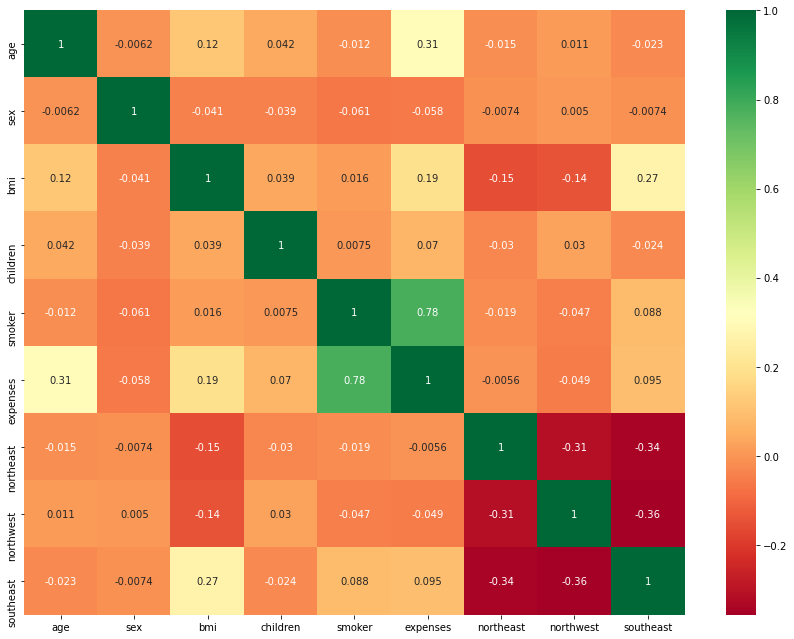

In [77]:
#plotting the correlation matrix
plt.figure(figsize=[12,9])
sns.heatmap(df_train.corr(), cmap='RdYlGn', annot=True)
plt.tight_layout()
plt.show()

In [78]:
#Let's start building the model
y_train=df_train.pop('expenses')
X_train=df_train

In [79]:
X_train.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast
0,0.847399,0,-0.965929,0.744470,1,0,1,0
1,0.847399,1,0.499899,-0.914635,0,1,0,0
2,0.349938,0,1.401947,-0.914635,0,0,1,0
3,-0.716049,1,0.064983,-0.914635,0,1,0,0
4,-0.076457,0,-0.241069,0.744470,0,0,1,0


In [80]:
y_train

0      0.890355
1     -0.272341
2     -0.512910
3     -0.760693
4     -0.553383
         ...   
931   -0.912452
932    2.026181
933   -0.110375
934   -0.544051
935   -0.860603
Name: expenses, Length: 936, dtype: float64

In [81]:
##adding the constant
X_train_sm=sm.add_constant(X_train)

##Learning the coeff
lr1=sm.OLS(y_train,X_train_sm)

##fit the model
lr1_model=lr1.fit()

##Checking the summary
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     326.2
Date:                Sat, 24 Jul 2021   Prob (F-statistic):          2.00e-263
Time:                        21:01:08   Log-Likelihood:                -701.49
No. Observations:                 936   AIC:                             1421.
Df Residuals:                     927   BIC:                             1465.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4475      0.039    -11.408      0.000      -0.524      -0.370
age            0.3017      0.017     17.767      0.000       0.268       0.335
sex         2.186e-05      0.034      0.001      0.999      -0.066       0.066
bmi            0.1484      0.018      8.356      0.000       0.114       0.183
children       0.0470      0.017      2.783      0.005       0.014       0.080
smoker         1.9780      0.043     46.275      0.000       1.894       2.062
northeast      0.1320      0.049      2.684      0.007       0.035       0.229
northwest      0.0697      0.048      1.440      0.150      -0.025       0.165
southeast      0.0543      0.047      1.148      0.251      -0.039       0.147
==============================================================================
Omnibus:                      225.106   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.634
Skew:                           1.274   Prob(JB):                    2.43e-118
Kurtosis:                       5.719   Cond. No.                         5.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
##Let's check the VIF of each, importing the library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
##checking VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,sex,1.61
7,southeast,1.39
6,northwest,1.25
5,northeast,1.23
4,smoker,1.20
2,bmi,1.11
0,age,1.02
3,children,1.01


- VIF values are in range, so we take  the call to drop the sex attrbiute as it has high p value and hence the coeffecient is not significant

In [90]:
##Dropping sex and rebuilding the model
X_train1=X_train

In [92]:
##adding the constant
X_train_sm1=sm.add_constant(X_train1)

##Learning the coeff
lr1=sm.OLS(y_train,X_train_sm1)

##fit the model
lr1_model=lr1.fit()

##Checking the summary
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     373.2
Date:                Sat, 24 Jul 2021   Prob (F-statistic):          9.99e-265
Time:                        21:09:03   Log-Likelihood:                -701.49
No. Observations:                 936   AIC:                             1419.
Df Residuals:                     928   BIC:                             1458.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4475      0.035    -12.799      0.000      -0.516      -0.379
age            0.3017      0.017     17.776      0.000       0.268       0.335
bmi            0.1484      0.018      8.367      0.000       0.114       0.183
children       0.0470      0.017      2.786      0.005       0.014       0.080
smoker         1.9780      0.043     46.386      0.000       1.894       2.062
northeast      0.1320      0.049      2.685      0.007       0.036       0.229
northwest      0.0697      0.048      1.441      0.150      -0.025       0.165
southeast      0.0543      0.047      1.149      0.251      -0.039       0.147
==============================================================================
Omnibus:                      225.107   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.635
Skew:                           1.274   Prob(JB):                    2.43e-118
Kurtosis:                       5.719   Cond. No.                         4.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Here we could see that after dropping Sex, there is  no change in the R-squared value which indicates that the Sex as an attribute was not signifacnt and hence was a redundant variable.

In [93]:
##checking VIF
vif=pd.DataFrame()
vif['Features']=X_train1.columns
vif['VIF']=[variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
3,smoker,1.19
6,southeast,1.17
1,bmi,1.11
4,northeast,1.07
5,northwest,1.06
0,age,1.02
2,children,1.01


In [94]:
#Dropping Southeast because of high p value
X_train2=X_train1.drop('southeast', axis=1)

In [95]:
##adding the constant
X_train_sm2=sm.add_constant(X_train2)

##Learning the coeff
lr1=sm.OLS(y_train,X_train_sm2)

##fit the model
lr1_model=lr1.fit()

##Checking the summary
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     435.0
Date:                Sat, 24 Jul 2021   Prob (F-statistic):          8.86e-266
Time:                        21:13:32   Log-Likelihood:                -702.15
No. Observations:                 936   AIC:                             1418.
Df Residuals:                     929   BIC:                             1452.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4197      0.025    -16.591      0.000      -0.469      -0.370
age            0.3007      0.017     17.738      0.000       0.267       0.334
bmi            0.1517      0.018      8.664      0.000       0.117       0.186
children       0.0463      0.017      2.748      0.006       0.013       0.079
smoker         1.9813      0.043     46.563      0.000       1.898       2.065
northeast      0.1046      0.043      2.434      0.015       0.020       0.189
northwest      0.0423      0.042      1.005      0.315      -0.040       0.125
==============================================================================
Omnibus:                      226.197   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.423
Skew:                           1.280   Prob(JB):                    3.65e-119
Kurtosis:                       5.727   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
##Dropping northwest and rebuilding
X_train3=X_train2.drop('northwest', axis=1)

In [97]:
##adding the constant
X_train_sm3=sm.add_constant(X_train3)

##Learning the coeff
lr1=sm.OLS(y_train,X_train_sm3)

##fit the model
lr1_model=lr1.fit()

##Checking the summary
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     521.8
Date:                Sat, 24 Jul 2021   Prob (F-statistic):          6.11e-267
Time:                        21:16:23   Log-Likelihood:                -702.66
No. Observations:                 936   AIC:                             1417.
Df Residuals:                     930   BIC:                             1446.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4055      0.021    -19.328      0.000      -0.447      -0.364
age            0.3012      0.017     17.776      0.000       0.268       0.334
bmi            0.1481      0.017      8.641      0.000       0.114       0.182
children       0.0468      0.017      2.778      0.006       0.014       0.080
smoker         1.9790      0.042     46.577      0.000       1.896       2.062
northeast      0.0898      0.040      2.224      0.026       0.011       0.169
==============================================================================
Omnibus:                      227.017   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.802
Skew:                           1.283   Prob(JB):                    6.75e-120
Kurtosis:                       5.736   Cond. No.                         2.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
##checking VIF
vif=pd.DataFrame()
vif['Features']=X_train3.columns
vif['VIF']=[variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
4,northeast,1.06
1,bmi,1.04
3,smoker,1.04
0,age,1.02
2,children,1.00


- So we have got our final model will all the attrbutes and hence we will do the residual analysis to see if the linear regression assumptions are true.

### Residual Analysis

In [99]:
y_train_pred=lr1_model.predict(X_train_sm3)

In [100]:
res=y_train-y_train_pred

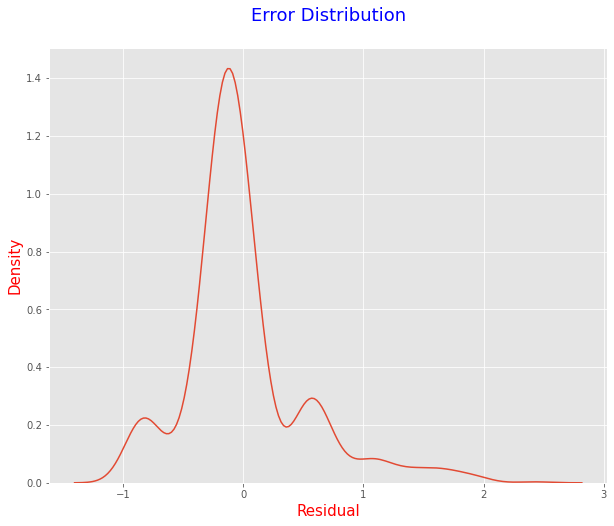

In [102]:
##plotting the distribution to  check if the error terms follow a normal distribution
plt.style.use('ggplot')
plt.figure(figsize=[10,8])
sns.distplot(res, hist=False)
plt.title('Error Distribution\n',fontdict={'fontsize':18, 'color':'Blue'})
plt.xlabel('Residual', fontdict={'fontsize':15, 'color':'red'})
plt.ylabel('Density', fontdict={'fontsize':15, 'color':'red'})
plt.show()

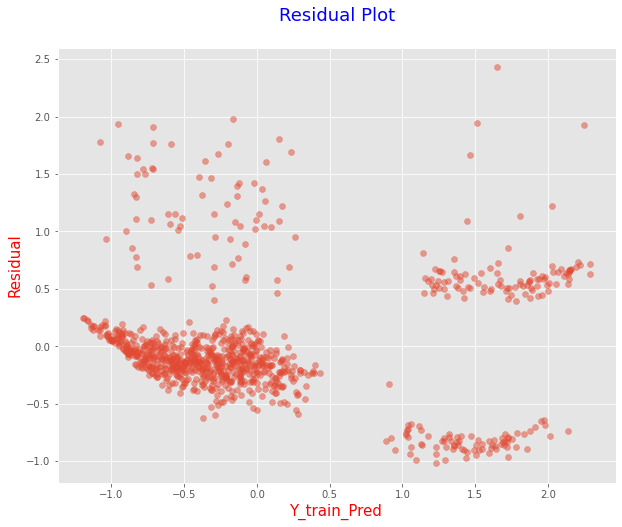

In [111]:
plt.figure(figsize=[10,8])
plt.scatter(y_train_pred, res,alpha=0.5)
plt.title('Residual Plot\n',fontdict={'fontsize':18, 'color':'Blue'})
plt.xlabel('Y_train_Pred', fontdict={'fontsize':15, 'color':'red'})
plt.ylabel('Residual', fontdict={'fontsize':15, 'color':'red'})
plt.show()

- Here, we could not see any underlying pattern when we plot the predicted values with the residuals. So, as per the assumptions of linear regression the model is performing well and I will assess the results in the test data set.

# Using test data

In [114]:
##Scaling the test data
num=['age','bmi','children','expenses']
df_test[num]=scaler.fit_transform(df_test[num])

In [116]:
df_test.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast
12,-1.181362,0,0.694653,-0.894718,0,-0.969244,0,0,0
306,-0.823643,1,-0.491817,0.766606,0,0.553671,0,0,0
318,0.321057,1,-0.474622,-0.894718,0,-0.504975,0,1,0
815,-1.395994,1,0.195991,-0.894718,0,-0.965005,0,0,1
157,-1.539081,0,-0.887308,-0.894718,1,0.166985,1,0,0


In [118]:
lr1_model.params.index.tolist()

['const', 'age', 'bmi', 'children', 'smoker', 'northeast']

In [119]:
df_test.drop(['sex','northwest','southeast'], axis=1, inplace=True)

In [120]:
df_test.head()

,age,bmi,children,smoker,expenses,northeast
12,-1.181362,0.694653,-0.894718,0,-0.969244,0
306,-0.823643,-0.491817,0.766606,0,0.553671,0
318,0.321057,-0.474622,-0.894718,0,-0.504975,0
815,-1.395994,0.195991,-0.894718,0,-0.965005,0
157,-1.539081,-0.887308,-0.894718,1,0.166985,1


In [121]:
#Seperating X_test and y_test
y_test=df_test.pop('expenses')
X_test=df_test

In [122]:
#Add the constant
X_test_sm=sm.add_constant(X_test)

In [123]:
#predicting expenses
y_test_pred=lr1_model.predict(X_test_sm)

In [126]:
##Checking the rsqaured of the model
print('R squared of training data:',r2_score(y_train,y_train_pred))
print('R squared of testing data:',r2_score(y_test,y_test_pred))

R squared of training data: 0.7372274175075477
R squared of testing data: 0.7768173739762729


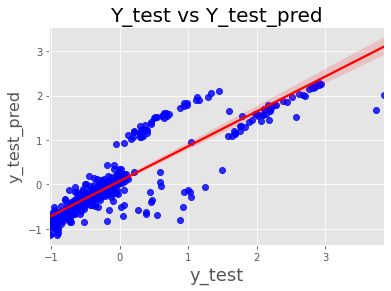

In [128]:
#Regression plot
sns.regplot(x = y_test, y = y_test_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Y_test vs Y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

In [134]:
##Adjusted rsqaured
print('Adjusted R Squared is :',1-((1-0.7768173739762729)*401)/(402-5-1))

Adjusted R Squared is : 0.7739994115264784


In [135]:
lr1_model.params.index.tolist()

['const', 'age', 'bmi', 'children', 'smoker', 'northeast']

In [136]:
lr1_model.params.values.tolist()

[-0.4055358049801365,
 0.3012233171549757,
 0.14807484320429715,
 0.04677505138222167,
 1.979018400463099,
 0.08981557674594126]

## Therefore expenses could be the function of  'age', 'bmi', 'children', 'smoker' and person belonging to 'northeast'

- Equation becomes

-  expenses=-0.4055358049801365+(0.3012233171549757×age)+(0.14807484320429715×bmi)+(0.04677505138222167×Children)+(0.08981557674594126×northeast)+(1.979018400463099×smoker)

## Story

- We could see that expense is a fucntion of attributes that are  quite intuitive.

- People belonging to higher age groups would be having more premium and ones in the lower age group would be having lower premiums.

- BMI is  also related to expense, higher  the BMI more unfit the person is and hence he/she gets surrounded with many diseases. So when BMI increases the chances of an individual not being healthy icreases and hence medical expense increase which would further lead to higher premiums which the company can charge

- Smoking has the highest coeffecient, a  smoker is considered  to be unhealthy and hence medical expense would be higher and thus resulting to higher premiums when insurane is taken.